<a href="https://colab.research.google.com/github/Vikram12301/Time-Series-Classification-for-FordA/blob/main/FordA_time_series_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sktime

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression,RidgeClassifierCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sktime.datatypes._panel._convert import from_2d_array_to_nested,from_nested_to_2d_array
from sktime.transformations.panel.rocket import Rocket
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,plot_roc_curve
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [7]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

X_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
X_test, y_test = readucr(root_url + "FordA_TEST.tsv")

In [8]:
np.isnan(X_train).any()

False

In [9]:
np.isnan(X_test).any()

False

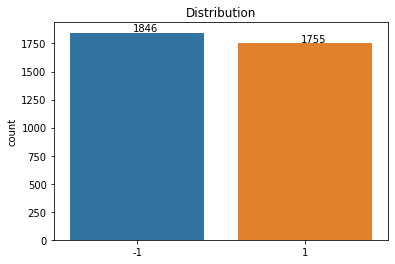

In [10]:
ax = sns.countplot(y_train)
plt.title('Distribution')
for p in ax.patches:
  ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.375, p.get_height()+10))

In [11]:
np.where(y_train==-1)[0][0]

0

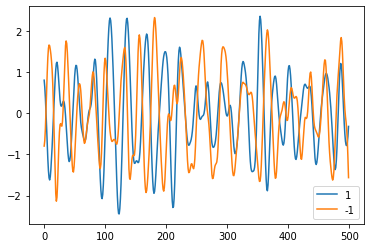

In [12]:
classes = np.unique(y_train)
f0 = np.where(y_train==1)[0][0]
f1 = np.where(y_train==-1)[0][0]
plt.plot(X_train[f0],label='1')
plt.plot(X_train[f1],label='-1')
plt.legend(loc="best")
plt.show()
plt.close()

In [13]:
X_train,X_cross,y_train,y_cross = train_test_split(X_train,y_train,stratify=y_train)

In [14]:
X_train = (X_train - np.mean(X_train,axis=1).reshape(2700,1))/np.std(X_train,axis=1).reshape(2700,1)

In [15]:
X_cross = (X_cross - np.mean(X_cross,axis=1).reshape(901,1))/np.std(X_cross,axis=1).reshape(901,1)

In [16]:
X_test = (X_test - np.mean(X_test,axis=1).reshape(1320,1))/np.std(X_test,axis=1).reshape(1320,1)

In [17]:
X_train_nested = from_2d_array_to_nested(X_train)
X_cross_nested = from_2d_array_to_nested(X_cross)
X_test_nested = from_2d_array_to_nested(X_test)

In [18]:
rocket = Rocket()

In [21]:
rocket_X_train = rocket.fit_transform(X_train_nested)

In [22]:
rocket_X_cross = rocket.transform(X_cross_nested)

In [23]:
rocket_X_test = rocket.transform(X_test_nested)

In [24]:
rocket_X_train.to_csv('rocket_X_train',index=False)
rocket_X_cross.to_csv('rocket_X_cross',index=False)
rocket_X_test.to_csv('rocket_X_test',index=False)


In [26]:
pd.DataFrame(y_train).to_csv('y_train',index=False)
pd.DataFrame(y_cross).to_csv('y_cross',index=False)
pd.DataFrame(y_test).to_csv('y_test',index=False)

In [28]:
rocket_X_train = pd.read_csv('/content/rocket_X_train')
rocket_X_cross = pd.read_csv('/content/rocket_X_cross')
rocket_X_test = pd.read_csv('/content/rocket_X_test')
y_cross = pd.read_csv('/content/y_cross')
y_train = pd.read_csv('/content/y_train')
y_test = pd.read_csv('/content/y_test')

In [29]:
model_log = LogisticRegression(max_iter=10000)

In [30]:
model_log.fit(rocket_X_train, y_train)

LogisticRegression(max_iter=10000)

In [31]:
ypred_logistic = model_log.predict(rocket_X_cross)

In [32]:
print("The accuracy for logistic regression is",accuracy_score(ypred_logistic,y_cross))
print("The precision for logistic regression is",precision_score(ypred_logistic,y_cross))
print("The recall for logistic regression is",recall_score(ypred_logistic,y_cross))

The accuracy for logistic regression is 0.9167591564927858
The precision for logistic regression is 0.9066059225512528
The recall for logistic regression is 0.9212962962962963


In [33]:
ridge = RidgeClassifierCV()

In [34]:
ridge.fit(rocket_X_train, y_train)

RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]))

In [35]:
ypred_ridge = ridge.predict(rocket_X_cross)

In [36]:
print("The accuracy for ridge classifier is",accuracy_score(ypred_ridge,y_cross))
print("The precision for ridge classifier is",precision_score(ypred_ridge,y_cross))
print("The recall for ridge classifier is",recall_score(ypred_ridge,y_cross))

The accuracy for ridge classifier is 0.8268590455049944
The precision for ridge classifier is 0.8041002277904328
The recall for ridge classifier is 0.83451536643026


In [37]:
svm = SVC()
svm.fit(rocket_X_train, y_train)

SVC()

In [38]:
ypred_svm = svm.predict(rocket_X_cross)

In [39]:
print("The accuracy for SVM is",accuracy_score(ypred_svm,y_cross))
print("The precision for SVM is",precision_score(ypred_svm,y_cross))
print("The recall for SVM is",recall_score(ypred_svm,y_cross))

The accuracy for SVM is 0.9156492785793563
The precision for SVM is 0.8997722095671982
The recall for SVM is 0.9250585480093677


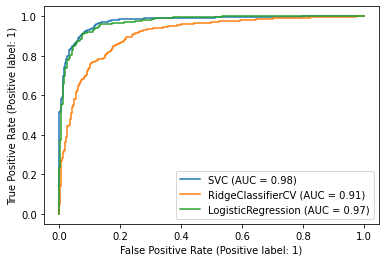

In [40]:
svc_disp = plot_roc_curve(svm, rocket_X_cross, y_cross)
ridge_disp = plot_roc_curve(ridge, rocket_X_cross, y_cross,ax=svc_disp.ax_)
plot_roc_curve(model_log, rocket_X_cross, y_cross,ax=ridge_disp.ax_)
plt.show()

In [41]:
ypred_SVM_test = svm.predict(rocket_X_test)

In [42]:
print("The accuracy is",accuracy_score(ypred_SVM_test,y_test))
print("The precision is",precision_score(ypred_SVM_test,y_test))
print("The recall is",recall_score(ypred_SVM_test,y_test))

The accuracy is 0.9166666666666666
The precision is 0.9076682316118936
The recall is 0.919175911251981


In [43]:
import pickle

In [45]:
pickle.dump(svm, open('finalized_model.sav', 'wb'))